In [5]:
print("Lecture-25")

Lecture-25


## Geri Beslemeli Sinir Ağları (Recurrent Neural Networks - RNN)

Kaynak: https://cs231n.stanford.edu/index.html

Şimdiye kadar görmüş odluuğumuz ağ mimarilerinde bir önrounnu çıktısı başka bir nörona girdi yapılıyordu. Bu tür ağ mimarilerine "ileriye doğru beslemeli (feed forward)" ağlar denilmektedir. Bu ağlarda geçmişin kaydı ağlda tutulamamaktadır. Halbuki zamana dayalı uygulamalarda, doğal dil işleme uyuglamalrında geçmişin de belli ölçülerde hatırlanması gerekmektedir. IMBD --> İYİ/KÖTÜ. Bu sonucun çıkartılmasında sözcükleri önemli olduğu açıktır. Ancak eğitim sırasında sözcüklerinin sırasının bir önemi yoktu. Yorum yazılarındaki sözcükler bir bağlam içerisinde gerçek anlamını bulabilmektedir. o Halde böyle bir bağlamın sinir ağlarında oluşturuabilşmesi için modelde bir biçimde geçmişin de etkili olması gerekir

Mesela bvideodaki görüntüler aslında framelerden oluşmaktadır. Fakat bu frame'ler birbirinden bağımsız değildir. Bir sonraki frame bir önceki frame'le ilgili olacak biçimde hareketli görüntüyü oluşturmaktadır. Göründtüdfe 10 saniye önce ne odluğu şimdi olanların anlamnlandırılmaıs için ön emşi olmabilmektedir. Yani çıakrtıalcak sonuç anlık değil geçmişe dayaldır. Kısaca "geri beslemeli ağ modeli geçmişin ve bağlamın da kestirimde dikkate alınmasını" sağlayan modeldir.

32 girdi katmanın (giriş) katmanına sahip olanb çıktısı 64'lük olan bir katman düşünelim.

Girdi 32'lik, bu girdi 32'lik giriş 64'lük bir dense katmana bağlanacaksa burada tahmin edilmesi gereken toplam W değerleri 32 * 64 olacaktır. Çünkü öğenin sıralı girdileri için aynı W değerleri kullanılmaktadır. Geri beslemeli ağlarda bir girdi öğresinin parçalarının tek tek uygulanması meselenin bir yönünü oluşturmaktadır. Meselenin diğer yönü "geri besleme" işlemi ile ilgilidir. Geri besleme nası lyapılıyor? 

Geri besleme işlemi bir katman olarak gerçekleştirilmektedir. Geri besleme katmanın çıktılarının her bir tanesi başka ağırlık değerleriyle çarpılıop toplanarak (dot product) bir sonraki girdi ile beraber yine aynı katmana girdi ypaılır. Girdinni belli bir öğesinin o andaki parçalı girdisi It olsun. Bir önceki parçalı girdidden elde edilen çıktının da Ot-1 olduğunu düşünelim. 


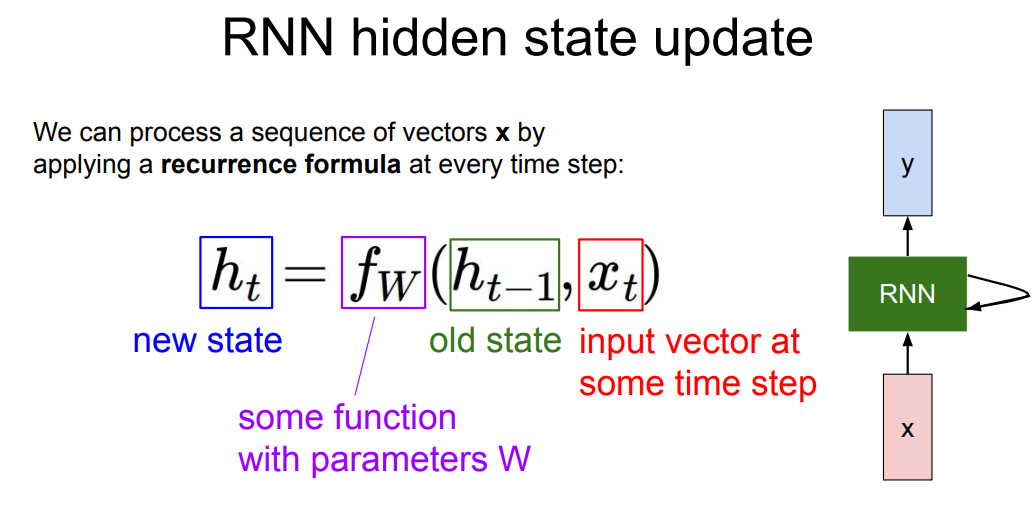


nöronun yeni çıktı değeri = activation(np.dot(It, W) + np.dot(Ot-1, U) + b)

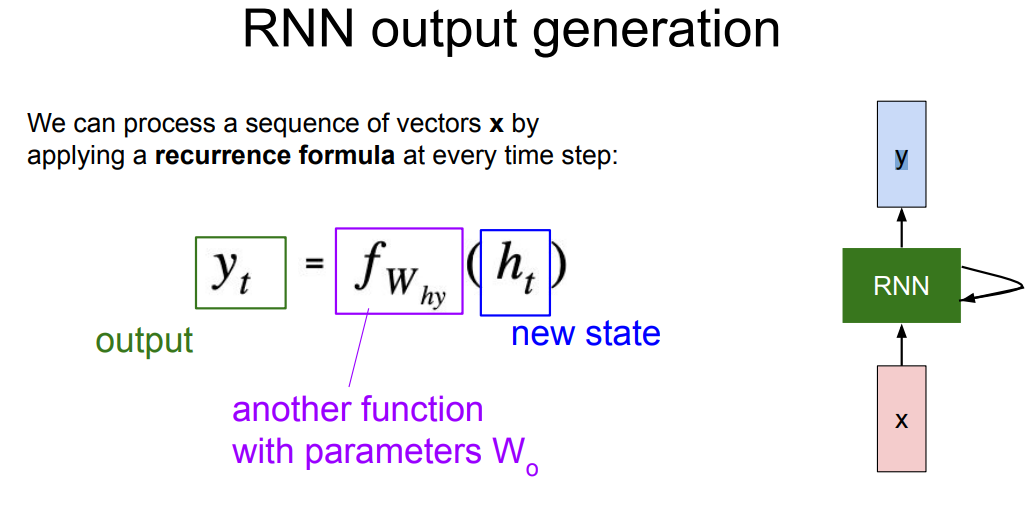

In [6]:
import numpy as np

TIMESPEC = 100 # ardışı uygulanacak eleman sayısı
INPUT_FEATURES = 32 # girdi katmanındaki nöron sayısı
RECURRENT_LAYER_SIZE = 64 # geri besleme katmanındaki nöron sayısı

def activation(x):
  return np.maximum(0, x)

inputs = np.random.random((TIMESPEC, INPUT_FEATURES)) # girdi oluşturoyurz.
W = np.random.random((RECURRENT_LAYER_SIZE, INPUT_FEATURES)) # ağırlık matrisi oluştur
U = np.random.random((RECURRENT_LAYER_SIZE, RECURRENT_LAYER_SIZE)) # geri besleme ağırlık matrisi
b = np.random.random((RECURRENT_LAYER_SIZE,)) # geri besleme katmanındaki bias vektör

outputs = []

output_t = np.random.random((RECURRENT_LAYER_SIZE,))
for input_t in inputs:
  output_t = activation(np.dot(W, input_t) + np.dot(U, output_t) + b)
  outputs.append(output_t)

total_outputs = np.concatenate(outputs, axis=0)

print(total_outputs)

[2.30603966e+001 2.39773241e+001 2.28208287e+001 ... 3.56150158e+150
 3.56361809e+150 4.12931560e+150]


In [7]:
total_outputs.shape

(6400,)

Bu kodda geri besleme katmanını girdi kümesi 32, çıktı kümesi 64 nöorndan oluşmaktadır. Bir öğe toplam 100 ayrı poarça biçiminde girişlere uygulanmaktadır. Yani guradaki örneği IMBDB ya da retures'e benzetirsek yazının 100 sözcükten oluştuğunu her sözcüğün word embedding yöntemi ile 32 eleman uzunluğınhda vektörle temsil edildiğini söyleyebilireiz. TIMESPEC, peşi sıra oluşan girdilerin sayısını (yazıdaki sözcük sayısını) INPUT_FETARUES ise bu girdilerin her birinni kaç özellik içerdiğini (word embedding'ten elde edilen vektör uzunluığu) belirtmektedir. RECURRENT_LAYER_SIZE ise geri beslemeli katmanındaki nöron sayısını belirtir. W, U ve b vektörleri 0 ile 1 arasında rastgeke sayılamrdan oluşacak biçimde alpdık. (np.random.random). Aktivasyon fonksiyolnu RELU (Recitifer Linear Unit).

tf.keras.layers.SimpleRNN( units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, **kwargs )

Sequential modelinde keras katmanları peşi sıra yığılfığı için bu katmanın girdisi aslında bir önceki katmanın çıktısını oluşturmaktadır. Dolayısıyla SimpleRNN katmanı ağın ilk katmanı olamaz. (Yani bu katmandan önce bir girdi katmanının olması gerekir). word embedding içeren bir embedding katmanı olur.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential(name = 'RNN')
model.add(Embedding(100, 32, name='Embedding'))
model.add(SimpleRNN(64, activation='relu', name='SimpleRNN'))
model.add(Dense(1, activation='sigmoid', name='Output'))
model.summary()

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, None, 32)          3200      
                                                                 
 SimpleRNN (SimpleRNN)       (None, 64)                6208      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


Embedding katmanındaki 32'lik girişlerin 100'lük vocabulary'den elde edilmesi için toplamda 100 * 32 = 3200 tane ağırlık değerinni bulunması gerekir. SimpleRNN katmanınn girdileri ise 32'lik vektörlerden oluşmakta. Fakat bugirişler aynı W değerleri ile çarpılacağından giriş için gereken W değerleri 32 * 64 = 2048 tane olur. Öte yandan her çıkış ayrıca dense biçimde yeniden SimpleRNN katmanındaki nöronlara bağlşanacağından dolayı buradaki U katsayılarının sayısı 64 *64 = 4096 olacaktır. Tabii bir bias değerleride oluyor. Bunlar da SimpleRNN katmanındaki nöron sayısı kadar yani 64. 32 * 64 + 64 * 64 + 64 = 6208. SimpleRNN katmanının çıktısı 64 nörondan oluşacağına göre ve çıktı katmanında tek bir nöron bulunduğuna göre çıktı katmanında parametre sayısı 64 * 1 +1 = 65 olacaktır.

SimpleRNN katmanının çıktısı en son parçalı girişten elde edilen tek boyutlu bir vektördür. Bu durum SimpleRNN katmaının çıktısına başka bir simpleRNN katmanı bağlanırken soruna yol açabilmektedir. 



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential(name = 'RNN')
model.add(Embedding(100, 32, name='Embedding'))
model.add(SimpleRNN(64, activation='relu', name='SimpleRNN-1'))
model.add(SimpleRNN(64, activation='relu', name='SimpleRNN-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))
model.summary()

ValueError: Input 0 of layer "SimpleRNN-2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)

BU kod çalıştırıldığında ikinci SimpleRNN katmanını eklenmesi işleminde exception oluşacaktır. Exception'ın nedeni ikinci SimpleRNN katmanının parçalı (xzamansal) beslemede kullanılbilecek matrisel bir girdi beklerken tek boyutlu vektörel bir bilgiyle karlşılşaıyor olmasıdır. Çünkü SimpleRNN katmanı default durumda çıktı olarak zamansal girişler uygulandığındaki en son çıktının değerini vermektedir.  (Halbuki bizim daha öne yazdığımız kod parçası bütün çıktıları biriktirip bir matris olarak veriyordu) İşte SimpleRNN katmanını çıktısı biriktirilmiş çıktı değerlerinden oluşan bir matris olmasını sağlamak için SimpleRNN fonksiyonnu return_sequences isimli parametresi True olarak verilmelidir. Bu parametre True verildiğinde artık ilk SimpleRNN katmaınnı çıktısı 64'lük vektörlerden oluşan bir matris lacaktır. Böylece ikinci SimpleRNN katmanını girdisi için gereken zamansal matris ihtiyacıınb karşılamış olduk. 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential(name = 'RNN')
model.add(Embedding(100, 32, name='Embedding'))
model.add(SimpleRNN(64, activation='relu', name='SimpleRNN-1', return_sequences=True))
model.add(SimpleRNN(64, activation='relu', name='SimpleRNN-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))
model.summary()

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, None, 32)          3200      
                                                                 
 SimpleRNN-1 (SimpleRNN)     (None, None, 64)          6208      
                                                                 
 SimpleRNN-2 (SimpleRNN)     (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


## IMDB Örneği - RNN